In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [4]:
pd.set_option('display.max_columns', 200)
data = pd.read_csv('/base_data.csv') # 경로설정
data=data[data['Pass_Fail']=='FAIL']
data=data[['PD_Tan_2field','PD_Tan_4field','PD_Tan_6field','PD_Tan_8field','PS_Tan_2field','PS_Tan_4field','PS_Tan_6field', 'PS_Tan_8field','PV_Tan_2field','PV_Tan_4field','PV_Tan_6field', 'PV_Tan_8field']]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
from sklearn.ensemble import IsolationForest
# IsolationForest 모델 만들기
isol = IsolationForest(max_samples=100, random_state=200) 

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
isol.fit(data)
y_pred= isol.predict(data)
isola=pd.DataFrame(y_pred, columns= ['isal'])
data=data.join(isola, how='inner')
data=data[data['isal']== 1]
data=data.drop(['isal'], axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)

In [7]:
data_scale.head()

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,PS_Tan_2field,PS_Tan_4field,PS_Tan_6field,PS_Tan_8field,PV_Tan_2field,PV_Tan_4field,PV_Tan_6field,PV_Tan_8field
0,-0.780303,-0.042848,0.332071,0.546580,1.143977,0.439900,0.836893,0.535386,0.330541,-0.323728,-0.696727,-0.444617
1,-0.714144,0.115308,0.521490,0.756067,1.678803,0.344837,1.243027,-0.132315,0.217271,-0.398574,-0.747651,-1.386658
4,-0.526693,0.052046,0.167359,0.359144,0.050015,-0.209700,0.176925,1.270989,0.511774,0.185230,-0.065270,1.064571
5,-0.659011,-0.055500,0.377367,0.808990,0.463289,-0.811768,0.265767,-0.551043,-0.054578,-0.293789,-0.472661,-0.021660
6,-0.692091,0.058372,0.381484,0.674477,1.411390,0.138866,0.379992,-0.562360,0.477793,0.110383,-0.513401,-0.694546


In [8]:
data_scale.cov() # 공분산행렬

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,PS_Tan_2field,PS_Tan_4field,PS_Tan_6field,PS_Tan_8field,PV_Tan_2field,PV_Tan_4field,PV_Tan_6field,PV_Tan_8field
PD_Tan_2field,1.001196,0.816155,0.476172,0.131123,0.109723,0.029771,0.103850,-0.059537,-0.530087,-0.050535,0.277671,0.157175
PD_Tan_4field,0.816155,1.001196,0.780925,0.372171,0.123911,0.023589,0.134222,0.042888,-0.371605,0.115817,0.276417,0.259492
PD_Tan_6field,0.476172,0.780925,1.001196,0.822032,0.005898,-0.128633,-0.041784,0.060588,-0.070764,0.242047,0.249457,0.218377
PD_Tan_8field,0.131123,0.372171,0.822032,1.001196,-0.173222,-0.187775,-0.194998,-0.021836,0.151913,0.187268,0.054805,0.064855
PS_Tan_2field,0.109723,0.123911,0.005898,-0.173222,1.001196,0.416920,0.259120,0.139746,-0.377566,-0.304626,-0.059907,-0.132060
PS_Tan_4field,0.029771,0.023589,-0.128633,-0.187775,0.416920,1.001196,0.729451,0.128565,-0.519267,-0.619395,-0.491322,-0.510712
PS_Tan_6field,0.103850,0.134222,-0.041784,-0.194998,0.259120,0.729451,1.001196,0.426182,-0.449998,-0.401069,-0.281311,-0.316198
PS_Tan_8field,-0.059537,0.042888,0.060588,-0.021836,0.139746,0.128565,0.426182,1.001196,0.041907,0.096214,0.056779,0.028934
PV_Tan_2field,-0.530087,-0.371605,-0.070764,0.151913,-0.377566,-0.519267,-0.449998,0.041907,1.001196,0.578397,0.145143,0.191148
PV_Tan_4field,-0.050535,0.115817,0.242047,0.187268,-0.304626,-0.619395,-0.401069,0.096214,0.578397,1.001196,0.717127,0.597227


In [9]:
data_scale.corr() #상관계수 행렬

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,PS_Tan_2field,PS_Tan_4field,PS_Tan_6field,PS_Tan_8field,PV_Tan_2field,PV_Tan_4field,PV_Tan_6field,PV_Tan_8field
PD_Tan_2field,1.000000,0.815180,0.475603,0.130966,0.109592,0.029736,0.103726,-0.059466,-0.529454,-0.050475,0.277339,0.156987
PD_Tan_4field,0.815180,1.000000,0.779992,0.371726,0.123763,0.023561,0.134062,0.042836,-0.371161,0.115679,0.276086,0.259182
PD_Tan_6field,0.475603,0.779992,1.000000,0.821050,0.005891,-0.128480,-0.041734,0.060516,-0.070679,0.241758,0.249159,0.218116
PD_Tan_8field,0.130966,0.371726,0.821050,1.000000,-0.173015,-0.187551,-0.194765,-0.021810,0.151731,0.187044,0.054740,0.064777
PS_Tan_2field,0.109592,0.123763,0.005891,-0.173015,1.000000,0.416422,0.258810,0.139579,-0.377115,-0.304262,-0.059836,-0.131902
PS_Tan_4field,0.029736,0.023561,-0.128480,-0.187551,0.416422,1.000000,0.728580,0.128411,-0.518647,-0.618655,-0.490735,-0.510102
PS_Tan_6field,0.103726,0.134062,-0.041734,-0.194765,0.258810,0.728580,1.000000,0.425673,-0.449461,-0.400590,-0.280975,-0.315820
PS_Tan_8field,-0.059466,0.042836,0.060516,-0.021810,0.139579,0.128411,0.425673,1.000000,0.041857,0.096099,0.056711,0.028899
PV_Tan_2field,-0.529454,-0.371161,-0.070679,0.151731,-0.377115,-0.518647,-0.449461,0.041857,1.000000,0.577706,0.144970,0.190920
PV_Tan_4field,-0.050475,0.115679,0.241758,0.187044,-0.304262,-0.618655,-0.400590,0.096099,0.577706,1.000000,0.716270,0.596513


In [10]:
# PCA 진행
pca = PCA(random_state=20210323)
X_p = pca.fit_transform(data_scale)

In [11]:
# Eigen value
fa= FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None)
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
ev

array([3.79633707, 2.9606116 , 1.52628916, 1.31061543, 0.78616275,
       0.49145569, 0.39870146, 0.28841239, 0.16946562, 0.15573148,
       0.09441239, 0.02180497])

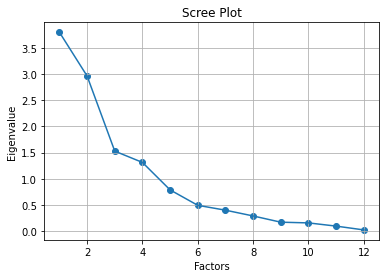

In [12]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
each_variance_ratio #각 PC별 분산 설명 비율

array([0.31636142, 0.24671763, 0.12719076, 0.10921795, 0.06551356,
       0.04095464, 0.03322512, 0.02403437, 0.01412213, 0.01297762,
       0.0078677 , 0.00181708])

In [14]:
# 누적 분산 설명 비율
cumsum = np.cumsum(pca.explained_variance_ratio_)

pd.Series(np.cumsum(pca.explained_variance_ratio_)) #고유값을 기준으로 설명 가능한 분산 (누적)
# 위의 것을 np.cumsum(pca.explained_variance_ratio_) 으로 써도 실행됨.

0     0.316361
1     0.563079
2     0.690270
3     0.799488
4     0.865001
5     0.905956
6     0.939181
7     0.963215
8     0.977338
9     0.990315
10    0.998183
11    1.000000
dtype: float64

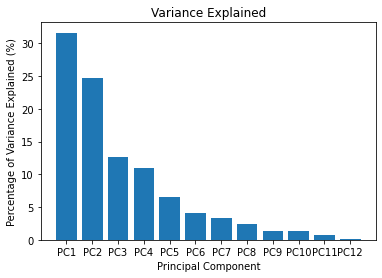

In [15]:
# 시각화 2
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [16]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:5], 
             columns = ['PC1','PC2','PC3','PC4','PC5'], 
             index=data.columns)

,PC1,PC2,PC3,PC4,PC5
PD_Tan_2field,-0.063553,-0.134940,-0.227439,-0.212338,0.209713
PD_Tan_4field,-0.478390,-0.528061,-0.432532,-0.230383,-0.181098
PD_Tan_6field,-0.093565,0.008521,0.309469,0.546818,-0.269389
PD_Tan_8field,-0.300323,-0.042051,0.216561,0.287650,-0.008966
PS_Tan_2field,-0.249276,-0.096525,0.134103,0.176288,0.877433
PS_Tan_4field,0.325424,0.080000,-0.082901,-0.152153,0.104963
PS_Tan_6field,-0.237335,-0.249292,0.016259,0.277228,-0.129709
PS_Tan_8field,0.015199,-0.371255,-0.029489,0.244493,-0.060257
PV_Tan_2field,-0.214090,0.048032,0.115715,-0.072518,0.151129
PV_Tan_4field,-0.407953,0.268690,0.111277,-0.218105,-0.073461


<AxesSubplot:>

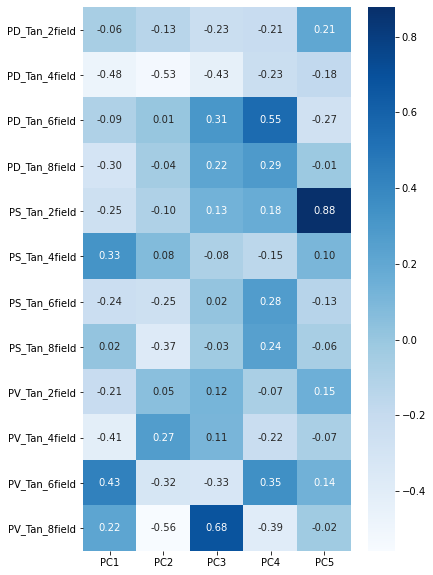

In [17]:
pca_result = pd.DataFrame(pca.components_[:,:5], 
             columns = ['PC1','PC2','PC3','PC4','PC5'], 
             index=data.columns)
plt.figure(figsize=(6,10))
sns.heatmap(pca_result, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

In [18]:
X_pp = pd.DataFrame(X_p[:,:5], 
                    columns = ['PC1','PC2','PC3','PC4','PC5'], 
                    index = data.index)
X_pp #PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

,PC1,PC2,PC3,PC4,PC5
0,1.074415,-0.170801,0.360253,1.298202,1.033883
1,1.572298,-0.523160,0.880519,1.048812,1.439376
4,-0.641277,0.116622,-0.482507,1.350235,0.142889
5,-0.062481,0.030721,0.901233,0.068159,0.695486
6,0.539021,-0.067990,0.785249,0.472049,1.514347
...,...,...,...,...,...
7343,-1.666955,2.470334,0.013433,0.428837,0.851017
7344,-1.464655,1.316907,0.498350,0.988810,0.195441
7346,-1.623247,1.980889,0.459928,0.696660,0.307572
7350,-1.794731,2.082734,0.891683,-0.055560,0.731433


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

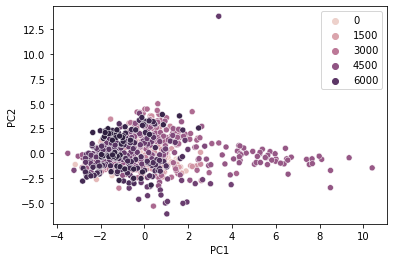

In [19]:
# Principal Component Pattern Plot 2
sns.scatterplot(data=X_pp, x='PC1',y='PC2',hue=X_pp.index)

In [20]:
# Bartlett Test
## 요인분석 모형의 적합성 여부 검정 (요인분석모형으로 적합한지 유의확률로 파악)
## H0: 상관관계 행렬이 단위행렬이다 --> 귀무가설이 기각되어야 요인분석 모델 사용가능
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(8175.260178987777, 0.0)

In [21]:
# KMO Test (Kaiser-Meyer-Olkin Test)
## 변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값
## 이 값이 작으면 요인분석을 위한 변수들의 선정이 적절하지 못하다는 것을 의미
## 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model =calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

0.5835209076610447

In [22]:
# factor 5개로 선택
fa = FactorAnalyzer(n_factors=5, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [23]:
# FA: Factor Loadings
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5
PD_Tan_2field,0.115881,0.924935,0.148466,-0.051986,0.062937
PD_Tan_4field,0.197358,0.758174,0.481546,0.100590,0.093138
PD_Tan_6field,0.182181,0.352887,0.929211,0.056909,0.029774
PD_Tan_8field,0.009268,0.012955,0.861585,-0.078752,-0.152057
PS_Tan_2field,-0.094614,0.094508,-0.046558,0.141701,0.618023
PS_Tan_4field,-0.585008,0.127259,-0.103964,0.420135,0.441350
PS_Tan_6field,-0.372272,0.228018,-0.122292,0.879064,0.176271
PS_Tan_8field,0.099401,-0.078140,0.042284,0.520265,0.064396
PV_Tan_2field,0.320302,-0.609208,0.115699,-0.077110,-0.471058
PV_Tan_4field,0.806157,-0.164154,0.173825,0.038536,-0.344402


<AxesSubplot:>

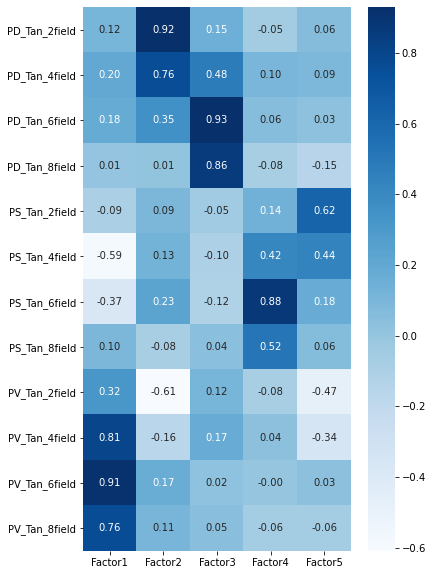

In [24]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지
# 아래 heat map을 보면, 요인5(6번째 요인)은 변수에 대해 높은 적재량을 가진 값(특징적인 값)이 없다.
# 따라서 5가지 요인을 최종 선택

In [25]:
fa.get_factor_variance()
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.754858,2.076431,1.935787,1.273220,0.993824
Proportion Var,0.229571,0.173036,0.161316,0.106102,0.082819
Cumulative Var,0.229571,0.402607,0.563923,0.670025,0.752843


In [26]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:5], 
                    columns = ['Factor1','Factor2','Factor3','Factor4','Factor5'], 
                    index = data_scale.index)
X_ff

,Factor1,Factor2,Factor3,Factor4,Factor5
0,-0.501154,-0.651481,0.363963,1.102581,0.162421
1,-0.685220,-0.520485,0.300556,1.665556,0.008318
4,0.255940,-0.430585,0.037362,0.459538,-0.180002
5,-0.329634,-0.376269,0.162560,0.616773,-0.461777
6,-0.310756,-0.592851,0.221707,0.809450,-0.052106
...,...,...,...,...,...
7343,0.686626,-1.513496,-0.231014,-1.083990,-0.062435
7344,0.478420,-1.021428,-0.051430,-0.277467,-0.354789
7346,0.451818,-1.188884,0.005130,-0.960119,-0.291182
7350,0.451020,-1.256713,-0.167748,-0.830980,-0.550136
